Final glacier length: 3718.9629201946636m
Final max ice thickness: 169.81943212398906m
Final max velocity: 0.01570968900128997715m/yr
B min: -0.360629296520368
B max: 0.22268912447103342
ICE:  [ 31.52988312  35.18708114  40.48369428  47.7050547   55.0482635
  72.44227059  86.26960744  95.20296429 100.66663918  96.58903997
  90.64811535  85.08260738  82.39318525  87.60431043  96.34282892
 120.06960041 140.12983291 129.20304843 123.62318357 123.758287
 124.9326211  126.80998376 130.625427   135.87187573 145.41185458
 154.66362069 162.12889744 167.90749923 169.81943212 164.79879528
 148.11121117 133.59831831 122.71467526 118.6773466  124.77302369
 127.88805947 127.15977378 124.71126974 120.42148716 123.24338559
 123.88706406 119.48056567 114.73550052 109.60857302 104.05063119
  98.00798842  90.16722431  80.99534191  70.92273068  60.42346078]
SLOPE:  [0.2508597  0.26995462 0.24958255 0.21266608 0.18374718 0.12510968
 0.09972723 0.08939739 0.08537643 0.09536589 0.11002308 0.12648927
 0.1376

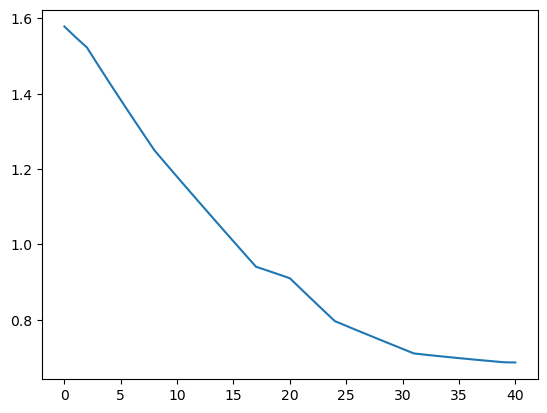

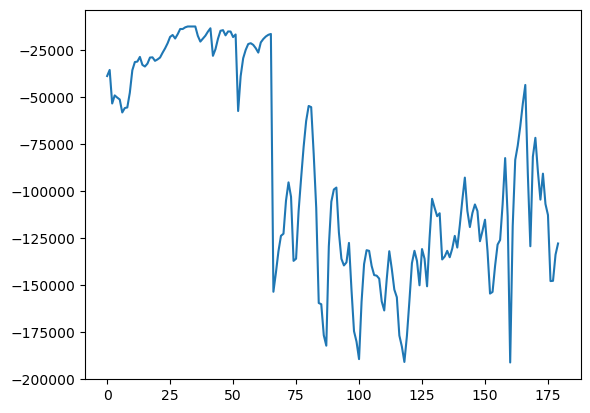

In [3]:
from matplotlib.animation import FuncAnimation
from glacierSim import glacierSim
import matplotlib.pyplot as plt
from IPython.core.display import HTML
import numpy as np
%matplotlib inline

fig, ax = plt.subplots() #initialize plotting variables
_ = plt.close(fig) #used to prevent an empty plot from displaying

ela=1880
time=1040
save=10
gamma=0.011
quiet=True
accumfactor= 7.86148311299302e-07
ice_meltfactor=-4.010722406223074e-05
snow_meltfactor=-4.010722406223074e-05
# meltfactor=-0.005
# accumfactor=0.0008
# accumfactor=1.000000082740371e-10
# ice_meltfactor= -1.000000082740371e-10
# snow_meltfactor=-1e-10
start_time=1000
ice = [
    50.81674576, 58.0492316, 65.39974357, 69.26584673, 75.6541392, 84.5574082,
    93.16036408, 112.38704694, 124.70816911, 131.82922523, 133.94461492, 128.04731581,
    119.78368355, 114.48489418, 112.37514056, 119.75831875, 135.23782532, 160.12199208,
    157.96061715, 146.35333828, 145.00609809, 144.29791671, 144.11173286, 146.38344403,
    149.4198206, 157.63435841, 165.81155222, 172.08082136, 176.45849045, 177.06836948,
    168.17467552, 149.15732577, 133.66691108, 119.98983147, 118.42297763, 122.25852634,
    120.05965747, 116.45899098, 109.25399911, 102.33371904, 104.5723128, 96.17898237,
    86.71000822, 75.76864291, 62.64653003, 45.85246872, 20.18519449, 0.0, 0.0, 0.0
]
model = glacierSim(ela=ela, time=time, save=save,gamma=gamma,quiet=quiet, ice_meltfactor=ice_meltfactor, snow_meltfactor=snow_meltfactor, accumfactor=accumfactor, initial_ice=ice, start_time=start_time)
# plt.plot(glac.x, glac.topo)
# plt.plot(glac.x,glac.ice+glac.topo, color='b')
# plt.gca().set_aspect('equal', adjustable='box')
# plt.show()
#print(model.dx)

line, = ax.plot([], [], 'b-')
ela_line = ax.axhline(y=model.start_ela, color='r')
snow_line, = ax.plot([], [], 'c-')

def update(frame):
    return model.run_model(frame)

anim = FuncAnimation(fig, update, model.frames, init_func=model.init(ax,ela=ela, time=time, save=save,gamma=gamma,quiet=quiet, ice_meltfactor=ice_meltfactor, snow_meltfactor=snow_meltfactor, accumfactor=accumfactor, initial_ice=ice, start_time=start_time), blit=False, repeat=False)
vid = HTML(anim.to_jshtml())
print("ICE: ",model.ice)
print("SLOPE: ",model.ice_slope)
print("MASS BALANCE: ",model.b)
print("WINTER MB DIFF: ", model.winter_mb-model.calculated_winter_mb)
print("SUMMER MB DIFF: ", model.summer_mb-model.calculated_summer_mb)
#print('CALCULATED ANNUAL MB: ', model.calculated_annual_mb)
print('ANNUAL MB DIFF: ',np.array(model.calculated_annual_mb)-np.array(model.annual_mb))
print("VOLUME DIFF: ", model.volume_validation-model.volume_data)
print("DONE")
plt.plot(model.yearly_volume_change)
plt.show()
plt.plot(model.volume_validation-model.volume_data)
plt.show()
#plt.plot(model.timestep_list)
#print(model.calculated_annual_mb, model.calculated_summer_mb, model.calculated_winter_mb)
#anim.save('animation.mp4', writer='ffmpeg', fps=15, dpi=100)
#print(model.calculated_summer_mb, model.calculated_winter_mb)
vid